# 데이터 처리 관련 실습

데이터를 처리하고, 몇가지 정보를 확인하고자 할 때 필요한 몇가지 방법들을 소개하고자 함.

 - 원하는 데이터를 추출하고자할 때
 - 특정 변수의 조건에 대해 새로운 변수를 만들고자할 때
 - 데이터의 전체적인 통계량 및 aggregation을 하고자 할 때
 - 차트를 이용해서 데이터를 확인하고자 할 때

우선, 데이터 중 하나를 입력하여 이에 대한 형태를 확인한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('titanic.csv')
data.shape

(891, 12)

In [30]:
data.head()
#sibsp: 형제자매수
#parch:같이탄 부모자식 수
#embarked: 승선위치

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 원하는 데이터를 추출할 때

특정 조건에 해당하는 데이터 셋을 찾고자 할 때 사용할 수 있음.

In [31]:
survived_data = data.loc[data['Survived']==1]
survived_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
print(survived_data.shape)

(342, 12)


생존하지 못한(class =0)인 데이터셋을 추출하세요

In [33]:
death_data = data.loc[data['Survived']==0]
death_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


나이가 20대인 승객들의 데이터를 추출하세요
 
- df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)] 이것을 활용

In [34]:
tweage_data= data.loc[(data['Age']>=20) & (data['Age']<30)]
tweage_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


성별이 남자이면서, Pclass가 1에 해당하는 데이터를 추출하세요

In [35]:
man_1_data= data.loc[(data['Sex']=='male')&(data['Pclass']==1)]
man_1_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C


나이가 10대 이거나, 성별이 여성인 데이터를 추출하세요.(OR)

In [36]:
# ten_orw_data= data.loc[((data['Age']>=10)&(data['Age']<20)) | (data['Sex']=='female')]
ten_orw_data= data.loc[(data['Age']/10==1)| (data['Sex']=='female')]
ten_orw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


특정 변수들을 추출하고자 할 때에는 다음과 같이 진행한다.

In [37]:
data_new = data[['Survived', 'Pclass', 'Sex']]
data_new.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


성별이 남자인 데이터 중, 'Survived', 'Pclass', 'Sex' 변수에 해당하는 데이터만 추출하세요

In [38]:
(data_new.loc[data_new['Sex']=='male']).head()

,Survived,Pclass,Sex
0,0,3,male
4,0,3,male
5,0,3,male
6,0,1,male
7,0,3,male


In [39]:
data.loc[data['Sex']=='male',['Survived', 'Pclass', 'Sex']].head()   ## 위에꺼랑 같은 결과

,Survived,Pclass,Sex
0,0,3,male
4,0,3,male
5,0,3,male
6,0,1,male
7,0,3,male


## 2. 변수 생성

기존의 데이터 프레임에서 변수들을 가져와서 새로운 변수를 생성할 수 있음

In [40]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


 numpy의 where문을 이용해서 다양한 조건에 해당하는 변수를 생성할 수 있음
 
 - numpy.where(조건, 조건이 참일때 값, 조건이 거짓일때 값)


In [41]:
data['family_type'] = np.where(data['family'] == 0, 'alone', 
                              np.where(data['family'] < 4, 'small', 'big'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,alone


나이 연령대를 기준을 주어서 나눠보세요.(age_group 이란 변수명으로) 10살 미만(young), 10대(10s), 20대(20s), 나머지(else)

In [42]:
data['age_group'] = np.where(data['Age']<10, 'young',
                            np.where(data['Age']<20,'10s',
                                    np.where(data['Age']<30, '20s','else')))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_type,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,small,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,small,else
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,alone,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,small,else
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,alone,else


## 3. 데이터 그룹화 및 통계량 산출

데이터를 특정 변수에 대해서 그룹화를 진행하여 통계량을 비교하고 싶을 수 있다. 이때 사용하는 방법은 groupby 를 이용한다.

In [43]:
data.groupby('Survived')

In [44]:
data.groupby('Survived').count()   #mean(), sum() std() 등등.. mean은 연속형변수만 나온다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_type,age_group
Survived,,,,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549,549,549,549
1,342,342,342,342,290,342,342,342,342,136,340,342,342,342


In [45]:
data.groupby(['Survived', 'Pclass'])['Fare'].mean()   # Fare 컬럼만.

Survived  Pclass
0         1         64.684008
          2         19.412328
          3         13.669364
1         1         95.608029
          2         22.055700
          3         13.694887
Name: Fare, dtype: float64

위에서 만든 연령대별, 성별로 그룹화하여 생존된 숫자를 확인하세요.

In [46]:
data.groupby(['age_group','Sex'])['Survived'].count()

age_group  Sex   
10s        female     45
           male       57
20s        female     72
           male      148
else       female    167
           male      340
young      female     30
           male       32
Name: Survived, dtype: int64

위에서는 하나의 통계량만 알 수 있었음.  
다른 방법으로 agg(aggregation)함수를 이용해 여러 통계량 알 수 있음

In [47]:
data_group=data.groupby(['Survived', 'Pclass'])['Fare']

In [48]:
data_group.agg(['size', 'mean', 'std', 'min', 'max'])

size       mean        std      min       max
Survived Pclass                                               
0        1         80  64.684008  60.662089   0.0000  263.0000
         2         97  19.412328  15.307175   0.0000   73.5000
         3        372  13.669364  12.118338   0.0000   69.5500
1        1        136  95.608029  85.286820  25.9292  512.3292
         2         87  22.055700  10.853502  10.5000   65.0000
         3        119  13.694887  10.692993   0.0000   56.4958

## 4. 차트로 확인하기

위에서 진행한 그룹화 과정을 차트로 직접 확인할 수 있다. 방법은 크게 두가지이며, 하나는 위에서 구한 groupby 데이터 객체를 이용하는 방식과, 기존의 데이터 프레임에서 pivot table을 이용하는 방식이 있다.

In [49]:
grouped_data=data.groupby(['Survived', 'Pclass'])['Fare'].mean()

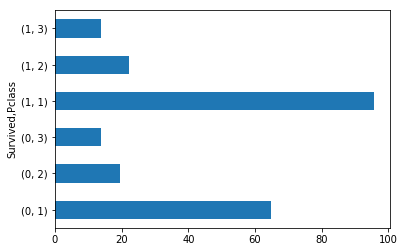

In [50]:
grouped_data.plot(kind='barh')

위에서 진행한 '연령대별, 성별로 그룹화하여 생존된 숫자' 를 바 차트로 표현하세요

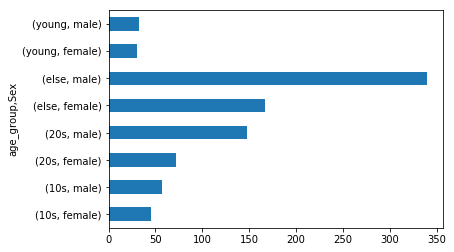

In [51]:
data.groupby(['age_group','Sex'])['Survived'].count().plot(kind='barh') # h 방향바꿈 'bar'하면 세로축

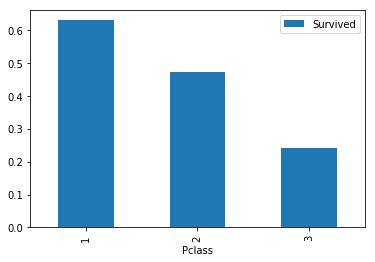

In [52]:
pclass_pivot = data.pivot_table(index=["Pclass"],values="Survived")
pclass_pivot.plot.bar()

특정 변수의 그룹으로 산점도를 색상을 다르게하면서 그릴 수 있음. 방법은 여러가지가 있지만, pandas에서 제공하는 데이터프레임을 이용해서 진행을 할 수 있고, 개인적으로 가장깔끔한 방법은 sns 패키지를 이용하는 방법임

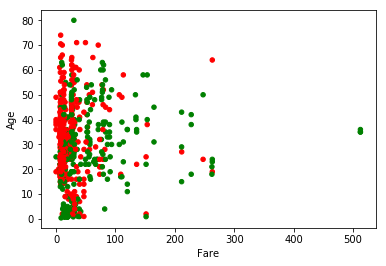

In [53]:
data['color'] = np.where(data['Survived'] == 0, 'red','green')
data.plot(kind='scatter', x='Fare', y='Age', c=data['color'])

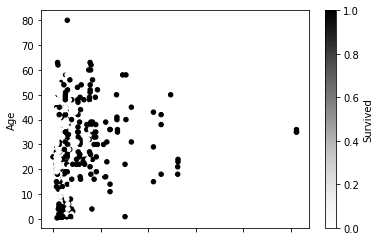

In [54]:
data.plot(kind='scatter', x='Fare', y='Age', c='Survived') # c자체에 변수를 넣으면 흑백으로 나옴

In [2]:
import seaborn as sns   # color지정안해도 됨! 더 간편!

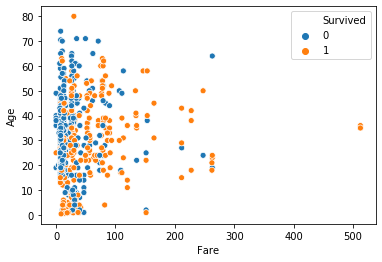

In [3]:
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=data)  #hue가 색상을 나타내고 싶은 변수

본인이 원하는 차트를 위와같이 그룹화를 하여 표현해보세요

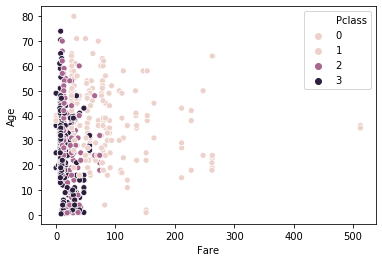

In [4]:
sns.scatterplot(x='Fare', y='Age', hue='Pclass', data= data)